In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from joblib import dump,load
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [166]:

df=pd.read_csv('data/IRIS.csv')

In [167]:

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [168]:
#Finding the dataset information
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [170]:
df['species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [171]:
label_encoder = LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])

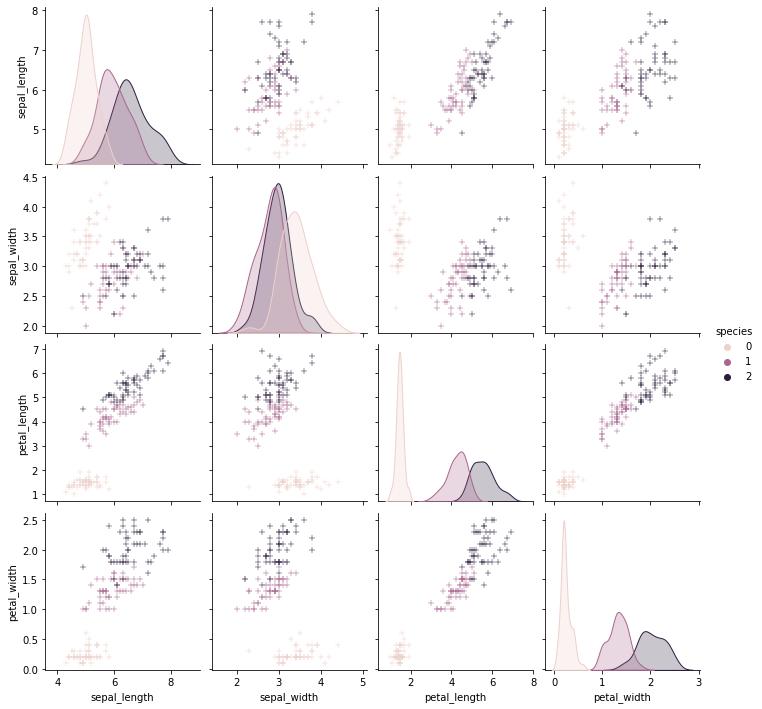

In [172]:
g = sns.pairplot(df, hue='species', markers='+')
plt.show()

<AxesSubplot:>

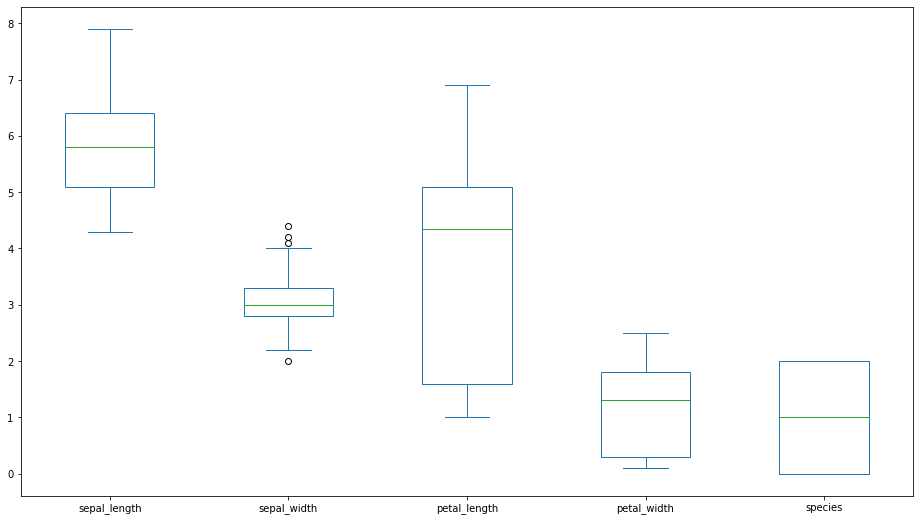

In [173]:
df.plot(kind='box',figsize=(16,9))

Models:

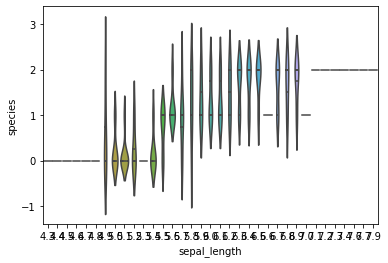

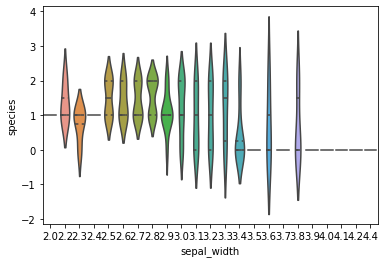

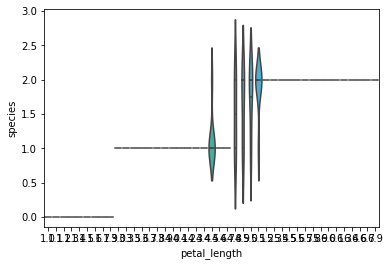

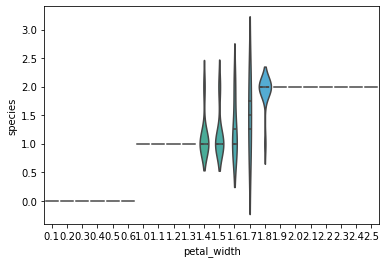

In [174]:
g = sns.violinplot(y='species', x='sepal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=df, inner='quartile')
plt.show()

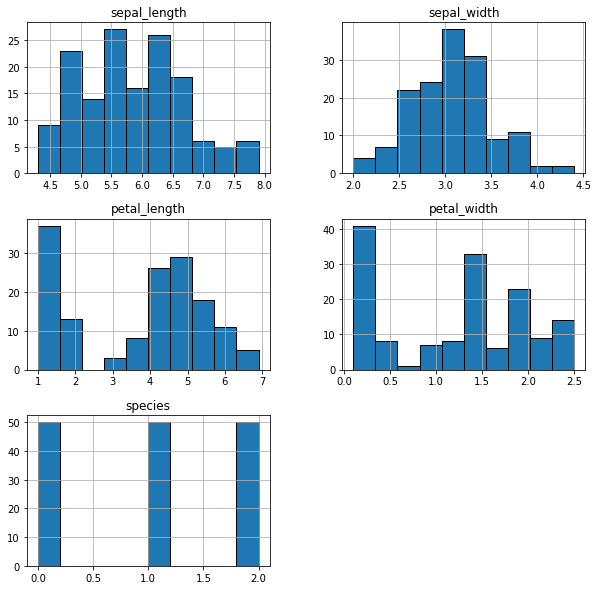

In [175]:
df.hist(edgecolor='black',figsize=(10,10))
plt.show()

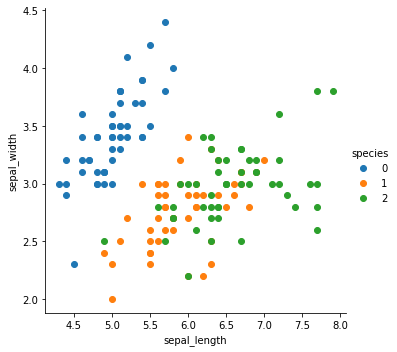

In [176]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

In [177]:
X=df.drop('species',axis=1)
y=df['species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [178]:
#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)


In [179]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [180]:
#Logistic Regression

lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

print("Accuracy score for Logistic Regression is: %.2f" % accuracy_score(y_test,y_pred))

Accuracy score for Logistic Regression is: 0.98


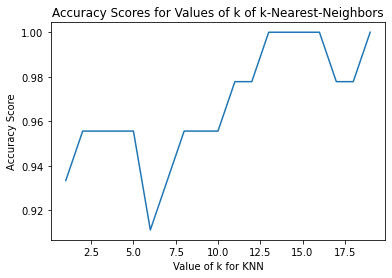

In [181]:
#Accuracy scores for various values of k for Iris data
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [182]:
#KNN

knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)

knn.fit(X_train,y_train)

print("Accuracy score for KNN classifier is: %.2f" % knn.score(X_test,y_test))

Accuracy score for KNN classifier is: 0.96


In [183]:
#SVM classifier

svm_classfier=SVC(gamma=9,kernel='rbf',C=1.0)

svm_classfier.fit(X_train,y_train)

print("Accuracy score for SVM classifier is: %.2f" % svm_classfier.score(X_test,y_test))


Accuracy score for SVM classifier is: 0.91


In [184]:
#Random Forest Classifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print("Accuracy score for Random Forest Classifier is: %.2f" % accuracy_score(y_test,y_pred))

Accuracy score for Random Forest Classifier is: 0.93


In [185]:
#Exporting all the models as pickle files
import pickle

pk_classifiers=[lr,knn,svm_classfier,rf]
pk_files=['lr_classifier.pkl','knn_classifier.pkl','svm_classifier.pkl','rf_classifier.pkl']

for idx,value in enumerate(pk_classifiers):
    print(idx,value)
    # pickle_out=open("models/" + pk_files[idx],"wb")
    # pickle.dump(pk_classifiers[idx],pickle_out)
    with open("models/" + pk_files[idx],"wb") as pickle_out:
        pickle.dump(pk_classifiers[idx],pickle_out)



    # pickle_out.close()

0 LogisticRegression()
1 KNeighborsClassifier()
2 SVC(gamma=9)
3 RandomForestClassifier(random_state=3)


In [ ]:
#sample prediction

lr.predict([[6.1,2.8,4.7,1.2]])
knn.predict([[6.1,2.8,4.7,1.2]])
rf.predict([[6.1,2.8,4.7,1.2]])
svm_classfier.predict([[6.1,2.8,4.7,1.2]])

# For output on the browser go to http://127.0.0.1:8000/docs#/ and enter the input values in the following format:
# {
#   "sepal_length": 6.1,
#   "sepal_width": 2.8,
#   "petal_length": 4.7,
#   "petal_width": 1.2
# }